In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

import numpy as np
from scipy.stats import truncnorm, norm
import random

from tvla_semirandom import *


In [2]:
from Cryptodome.Cipher import AES

key = bytes.fromhex('d7b4fee6694c1ddd31cf1f67585d6c16')
plain = bytes.fromhex('f501bbb5707f53bf41557d334afc4dc5')
ciph1 = AESSemi(key, print_states=True).encrypt_block(plain)
bias_state = bytes.fromhex('c9aa565b1f42e1f9446e5ec6eb7cec0b')
ciph2 = AESSemi(key, print_states=True).partial_encrypt_block(5, 'mix_columns', bias_state)
ciph3 = AES.new(key, AES.MODE_ECB).encrypt(plain)
print(f'{"key":10s} {key.hex()}')
print(f'{"plain":10s} {plain.hex()}')
print(f'{"ciph1":10s} {ciph1.hex()}')
print(f'{"ciph2":10s} {ciph2.hex()}')
print(f'{"ciph3":10s} {ciph3.hex()}')
assert ciph1 == ciph2 == ciph3

  0 add_round_key   f501bbb5707f53bf41557d334afc4dc5
  1 sub_bytes       22b5455319334e62709a625412a121d3
  1 shift_rows      93d56eedd4c32faa51b8aa20c932fd66
  1 mix_columns     93c3aa66d4b8fded51326eaac9d52f20
  1 add_round_key   af8db50b704ea1e3302d5ae0e22922fa
  2 sub_bytes       35690c8783e605b2f24ae1d67813f5da
  2 shift_rows      96f9fe17ec8e6b3789d6f8f6bc7de657
  2 mix_columns     968ef857ecd6e617897dfe37bcf96bf6
  2 add_round_key   11d50a79537dd431475d4a6dee1e92ba
  3 sub_bytes       093f044db83f7e546e785b3e5d0154c9
  3 shift_rows      0175f2e36c75f3209fbc39b24c7c20dd
  3 mix_columns     017539dd6cbc20e39f7cf2204c75f3b2
  3 add_round_key   797d7aeec48caef5734a7c74461a092d
  4 sub_bytes       a523fbb7f39085c96d73461beb3cf531
  4 shift_rows      06260fa90d6097dd3c8f5aafe9ebe6c7
  4 mix_columns     06605ac70d8fe6a93ceb0fdde92697af
  4 add_round_key   31ef80a5df90b5378c3db5019ba810d4
  5 sub_bytes       12019d69cb6283c786f6b99e3c45e057
  5 shift_rows      c97c5ef91faaecc64442560beb

In [3]:

key = os.urandom(16)
tvla_generator = aes128_semi_random_generator(key, 0, 8, 5, 'mix_columns')
for _ in tqdm.trange(10_000):
    (plain, cipher) = next(tvla_generator)

100%|██████████| 10000/10000 [00:04<00:00, 2047.82it/s]


In [ ]:
data = norm(loc=128/2, scale=np.sqrt(128/4)).rvs(10_000*100)
data_biased = [next(random_hw_normal(50, 65, 128)) for _ in range(6500*100)]

<Axes: ylabel='Count'>

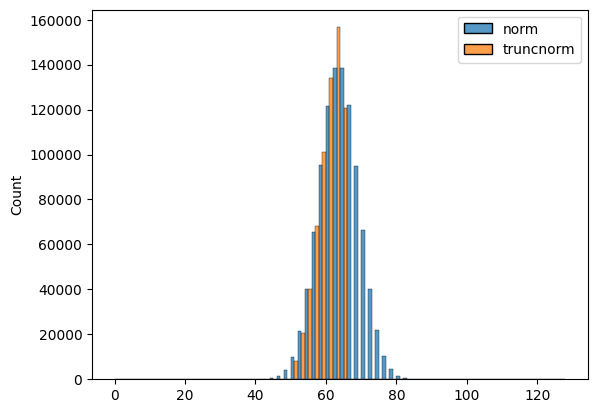

In [31]:

sns.histplot(
    {
        'norm': data, 
        'truncnorm': data_biased
    },
    binrange=(0,128), bins=64, multiple='dodge')